### Practical no.: 5
Name: Pranav Mohgaonkar <br>
Roll no.: 56 <br>
Batch: E3 <br>
Branch: CSE(AIML) <br>
Semester: VI

### AIM: Text Summarization using Spacy

In [1]:
# !pip install spacy
import spacy
# !python3 -m spacy download en_core_web_sm

d:\SOFTWARES\PYTHON\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
# !pip install nltk
import nltk
# nltk.download('all')
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
txt = nltk.corpus.genesis.raw()
txt = txt[:5000]

### Flowchart
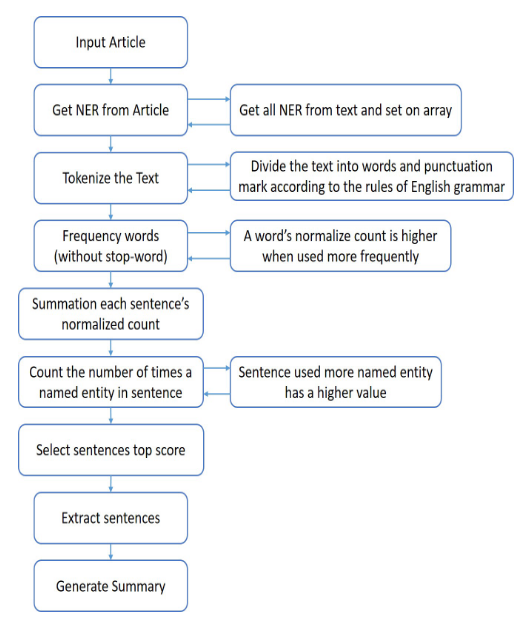

In [5]:
# NER from text
nlp_txt = nlp(txt)
nlp_ner = [(i, i.label_, i.label) for i in nlp_txt.ents]
nlp_ner[:20]

[(earth, 'LOC', 385),
 (Spirit, 'ORG', 383),
 (the light Day, 'DATE', 391),
 (Night, 'WORK_OF_ART', 388),
 (the first day, 'DATE', 391),
 (the
  morning,
  'TIME',
  392),
 (the second day, 'DATE', 391),
 (one, 'CARDINAL', 397),
 (Earth, 'LOC', 385),
 (Se, 'PERSON', 380),
 (the third day, 'DATE', 391),
 (the day, 'DATE', 391),
 (the night, 'TIME', 392),
 (seasons, 'DATE', 391),
 (days, 'DATE', 391),
 (two, 'CARDINAL', 397),
 (the
  day,
  'DATE',
  391),
 (the day, 'DATE', 391),
 (the night, 'TIME', 392),
 (the fourth day, 'DATE', 391)]

In [6]:
ner_txt = []
for i in nlp_ner:
  ner_txt.append(str(i[0]))
ner_txt

['earth',
 'Spirit',
 'the light Day',
 'Night',
 'the first day',
 'the\nmorning',
 'the second day',
 'one',
 'Earth',
 'Se',
 'the third day',
 'the day',
 'the night',
 'seasons',
 'days',
 'two',
 'the\nday',
 'the day',
 'the night',
 'the fourth day',
 'the fifth day',
 'Behold',
 'the sixth day',
 'the seventh day God',
 'the seventh day',
 'the seventh day',
 'the day',
 'Eden']

In [7]:
ner_text_dict = {}
for i in ner_txt:
  if i not in ner_text_dict.keys():
    ner_text_dict[i] = 0
  ner_text_dict[i] += 1
ner_text_dict

{'earth': 1,
 'Spirit': 1,
 'the light Day': 1,
 'Night': 1,
 'the first day': 1,
 'the\nmorning': 1,
 'the second day': 1,
 'one': 1,
 'Earth': 1,
 'Se': 1,
 'the third day': 1,
 'the day': 3,
 'the night': 2,
 'seasons': 1,
 'days': 1,
 'two': 1,
 'the\nday': 1,
 'the fourth day': 1,
 'the fifth day': 1,
 'Behold': 1,
 'the sixth day': 1,
 'the seventh day God': 1,
 'the seventh day': 2,
 'Eden': 1}

In [8]:
mx = 0
for i in ner_text_dict.keys():
  mx = max(mx, ner_text_dict[i])
mx

3

In [9]:
for i in ner_text_dict.keys():
  ner_text_dict[i] = round(ner_text_dict[i]/mx, 4)

In [10]:
# word tokenization of text without stop words
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

pos_tag = ['PEOPN', 'ADJ', 'NOUN', 'VERB']
stopwords = list(STOP_WORDS)
keywords = []
for i in nlp_txt:
  if(i.text in stopwords or i.text in punctuation):
    continue
  if(i.pos_ in pos_tag):
    keywords.append(i)

keywords[:20]

[beginning,
 created,
 heaven,
 earth,
 earth,
 form,
 void,
 darkness,
 face,
 deep,
 moved,
 face,
 waters,
 said,
 Let,
 light,
 light,
 saw,
 light,
 good]

In [11]:
# frequecy of words
freq_words = {}
for i in keywords:
  i = str(i)
  if i not in freq_words.keys():
    freq_words[i] = 0
  freq_words[i] += 1

mx = 0
for i in freq_words.keys():
  mx = max(mx, freq_words[i])
print("max freq: ", mx)

max freq:  24


In [12]:
# normalization of frequency
for i in freq_words.keys():
  freq_words[i] = round(freq_words[i]/mx,4)

freq_words

{'beginning': 0.0417,
 'created': 0.2917,
 'heaven': 0.0417,
 'earth': 1.0,
 'form': 0.0417,
 'void': 0.0417,
 'darkness': 0.125,
 'face': 0.1667,
 'deep': 0.0417,
 'moved': 0.0417,
 'waters': 0.4583,
 'said': 0.4167,
 'Let': 0.3333,
 'light': 0.4167,
 'saw': 0.2917,
 'good': 0.2917,
 'divided': 0.0833,
 'called': 0.2083,
 'evening': 0.25,
 'morning': 0.25,
 'day': 0.5417,
 'firmament': 0.3333,
 'midst': 0.0417,
 'let': 0.25,
 'divide': 0.125,
 'firmame': 0.0417,
 'second': 0.0417,
 'gathered': 0.0417,
 'place': 0.0417,
 'dry': 0.0833,
 'land': 0.0833,
 'appe': 0.0417,
 'Earth': 0.0417,
 'gathering': 0.0417,
 'bring': 0.125,
 'grass': 0.0833,
 'herb': 0.2083,
 'yielding': 0.2083,
 'seed': 0.25,
 'fruit': 0.1667,
 'tree': 0.1667,
 'kind': 0.25,
 'ear': 0.0833,
 'brought': 0.0833,
 'lights': 0.125,
 'night': 0.0833,
 'signs': 0.0417,
 'seasons': 0.0417,
 'days': 0.0417,
 'yea': 0.0417,
 'great': 0.0833,
 'greater': 0.0417,
 'rule': 0.125,
 'lesser': 0.0417,
 'nig': 0.0417,
 'stars': 0.04

In [13]:
# ranking sentences
sents = {}
for sent in nlp_txt.sents:

  if(sent not in sents.keys()):
    sents[sent] = 0

  for w in sent:
    word = str(w.text)
    if(word in freq_words.keys()):
      sents[sent] += freq_words[word]
  
  for i in ner_text_dict.keys():
    if i in str(sent):
      sents[sent] += ner_text_dict[i]
sents

{In the beginning God created the heaven and the earth.: 1.7084,
 And the earth was without form, and void; and darkness was
 upon the face of the deep.: 1.7501000000000002,
 And the Spirit of God moved upon
 the face of the waters.: 1.0,
 And God said, Let there be light: and there was light.: 1.5834000000000001,
 And God saw the light, that it was good: and God divided the
 light from the darkness.: 1.6251,
 And God called the light Day, and the darkness he called
 Night.: 1.6249,
 And the evening and the morning were the first day.: 1.375,
 And God said, Let there be a firmament in the midst of the
 waters, and let it divide the waters from the waters.: 2.8749,
 And God made the firmament, and divided the waters which were
 under the firmament from the waters which were above the
 firmame and it was so.: 1.7082,
 And God called the firmament Heaven.: 0.5416,
 And the evening and the
 morning were the second day.: 1.7499999999999998,
 And God said, Let the waters under the heaven be 

In [14]:
sent_list = []
for i in sents.keys():
  temp = ( round(sents[i], 4), i)
  sent_list.append(temp)
sent_list.sort(reverse=True)
sent_list[:10]

[(7.1251,
  These are the generations of the heavens and of the earth when
  they were created, in the day that the LORD God made the earth
  and the heavens,
  And every plant of the field before it was in the earth, and
  every herb of the field before it gr for the LORD God had
  not caused it to rain upon the earth, and there was not a man
  to till the ground.),
 (5.7502,
  And God set them in the firmament of the heaven to give light
  upon the earth,
  And to rule over the day and over the night, and to divide the
  light from the darkne and God saw that it was good.),
 (4.8748,
  And God said, Let us make man in our image, after our
  likene and let them have dominion over the fish of the sea,
  and over the fowl of the air, and over the cattle, and over
  all the earth, and over every creeping thing that creepeth
  upon the earth.),
 (4.7501,
  And God said, Let there be lights in the firmament of the
  heaven to divide the day from the night; and let them be for
  signs, and 

In [15]:
# joining top sentences
summary = ""
sent_len = min(5, len(sent_list))
for i in range(sent_len):
  summary += str(sent_list[i][1])
summary

'These are the generations of the heavens and of the earth when\nthey were created, in the day that the LORD God made the earth\nand the heavens,\nAnd every plant of the field before it was in the earth, and\nevery herb of the field before it gr for the LORD God had\nnot caused it to rain upon the earth, and there was not a man\nto till the ground.\nAnd God set them in the firmament of the heaven to give light\nupon the earth,\nAnd to rule over the day and over the night, and to divide the\nlight from the darkne and God saw that it was good.\nAnd God said, Let us make man in our image, after our\nlikene and let them have dominion over the fish of the sea,\nand over the fowl of the air, and over the cattle, and over\nall the earth, and over every creeping thing that creepeth\nupon the earth.\nAnd God said, Let there be lights in the firmament of the\nheaven to divide the day from the night; and let them be for\nsigns, and for seasons, and for days, and yea\nAnd God said, Let the earth b

Named Entity Recognition and Dependency Parsing for Information Extration using spacy.
Consider any text file (research article technical blog , any unstructured corpus used before)
Perform NER to extract entities from individual sentences using spacy.
use Dependency parsing, POS tagging to extract relationships between the entities.
Create a tuple for information extraction
T1( Entity1, Entity2, Relation label)
Display no of such tuples extracted from considered corpus as extracted information


In [29]:
from nltk.corpus import gutenberg
gutenberg.fileids()
txt = gutenberg.raw('bible-kjv.txt')

In [17]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(txt[:10000])
for word in doc[:20]:
  print(word.text, word.tag_, word.pos_, word.dep_,end=" ")

[ XX X dep The DT DET det King NNP PROPN compound James NNP PROPN compound Bible NNP PROPN nsubj ] -RRB- PUNCT punct 

 _SP SPACE dep The DT DET det Old NNP PROPN compound Testament NNP PROPN appos of IN ADP prep the DT DET det King NNP PROPN compound James NNP PROPN compound Bible NNP PROPN pobj 

 _SP SPACE dep The DT DET det First NNP PROPN compound Book NNP PROPN appos of IN ADP prep 

In [18]:
print(doc.text.split())

['[The', 'King', 'James', 'Bible]', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis', '1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth.', '1:2', 'And', 'the', 'earth', 'was', 'without', 'form,', 'and', 'void;', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep.', 'And', 'the', 'Spirit', 'of', 'God', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters.', '1:3', 'And', 'God', 'said,', 'Let', 'there', 'be', 'light:', 'and', 'there', 'was', 'light.', '1:4', 'And', 'God', 'saw', 'the', 'light,', 'that', 'it', 'was', 'good:', 'and', 'God', 'divided', 'the', 'light', 'from', 'the', 'darkness.', '1:5', 'And', 'God', 'called', 'the', 'light', 'Day,', 'and', 'the', 'darkness', 'he', 'called', 'Night.', 'And', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day.', '1:6', 'And', 'God', 'said,', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the

In [19]:
explain = nlp(txt[0:10000])
print([word.lemma_ for word in explain])


['[', 'the', 'King', 'James', 'Bible', ']', '\n\n', 'the', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', '\n\n', 'the', 'First', 'Book', 'of', 'Moses', ':', ' ', 'call', 'Genesis', '\n\n\n', '1:1', 'in', 'the', 'begin', 'God', 'create', 'the', 'heaven', 'and', 'the', 'earth', '.', '\n\n', '1:2', 'and', 'the', 'earth', 'be', 'without', 'form', ',', 'and', 'void', ';', 'and', 'darkness', 'be', 'upon', '\n', 'the', 'face', 'of', 'the', 'deep', '.', 'and', 'the', 'Spirit', 'of', 'God', 'move', 'upon', 'the', 'face', 'of', 'the', '\n', 'water', '.', '\n\n', '1:3', 'and', 'God', 'say', ',', 'let', 'there', 'be', 'light', ':', 'and', 'there', 'be', 'light', '.', '\n\n', '1:4', 'and', 'God', 'see', 'the', 'light', ',', 'that', 'it', 'be', 'good', ':', 'and', 'God', 'divide', 'the', 'light', '\n', 'from', 'the', 'darkness', '.', '\n\n', '1:5', 'and', 'God', 'call', 'the', 'light', 'Day', ',', 'and', 'the', 'darkness', 'he', 'call', 'Night', '.', '\n', 'and', 'the', 'evening', 'and'

In [20]:
for word in doc:
  print(f"{word.text} === > {word.pos_}")

[ === > X
The === > DET
King === > PROPN
James === > PROPN
Bible === > PROPN
] === > PUNCT


 === > SPACE
The === > DET
Old === > PROPN
Testament === > PROPN
of === > ADP
the === > DET
King === > PROPN
James === > PROPN
Bible === > PROPN


 === > SPACE
The === > DET
First === > PROPN
Book === > PROPN
of === > ADP
Moses === > PROPN
: === > PUNCT
  === > SPACE
Called === > VERB
Genesis === > PROPN



 === > SPACE
1:1 === > NUM
In === > ADP
the === > DET
beginning === > VERB
God === > PROPN
created === > VERB
the === > DET
heaven === > NOUN
and === > CCONJ
the === > DET
earth === > NOUN
. === > PUNCT


 === > SPACE
1:2 === > NUM
And === > CCONJ
the === > DET
earth === > NOUN
was === > AUX
without === > ADP
form === > NOUN
, === > PUNCT
and === > CCONJ
void === > ADJ
; === > PUNCT
and === > CCONJ
darkness === > NOUN
was === > AUX
upon === > SCONJ

 === > SPACE
the === > DET
face === > NOUN
of === > ADP
the === > DET
deep === > ADJ
. === > PUNCT
And === > CCONJ
the === > DET
Spirit === > PR

In [21]:
print([(i, i.label_, i.label) for i in doc.ents])

[(The King James Bible, 'WORK_OF_ART', 388), (The Old Testament of the King James Bible, 'WORK_OF_ART', 388), (Genesis, 'WORK_OF_ART', 388), (1:1, 'CARDINAL', 397), (1:2, 'CARDINAL', 397), (Spirit, 'ORG', 383), (1:3, 'CARDINAL', 397), (God, 'PERSON', 380), (1:4, 'CARDINAL', 397), (1:5, 'CARDINAL', 397), (the light Day, 'DATE', 391), (Night, 'TIME', 392), (the first day, 'DATE', 391), (1:6, 'CARDINAL', 397), (1:7, 'CARDINAL', 397), (the
morning, 'TIME', 392), (the second day, 'DATE', 391), (one, 'CARDINAL', 397), (God, 'PERSON', 380), (Earth, 'LOC', 385), (the third day, 'DATE', 391), (the day, 'DATE', 391), (the night, 'TIME', 392), (days, 'DATE', 391), (years, 'DATE', 391), (two, 'CARDINAL', 397), (the day, 'DATE', 391), (the night, 'TIME', 392), (1:18, 'TIME', 392), (the day, 'DATE', 391), (the night, 'TIME', 392), (the evening and the morning, 'TIME', 392), (the fourth day, 'DATE', 391), (God, 'PERSON', 380), (earth, 'LOC', 385), (the evening and the morning, 'TIME', 392), (the fift

In [22]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [23]:
displacy.render(doc, style='dep', jupyter=True, options={"distance":90,"width": 60, "height": 100})

In [24]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print(len(spacy_stopwords))
print(list(spacy_stopwords)[:20])

326
['were', 'nothing', 'down', 'now', '‘ll', 'seeming', 'thence', 'sometimes', 'ours', 'did', 'though', 'via', 'few', 'up', 'own', 'back', 'is', 'besides', 'no', 'third']


In [25]:
for token in doc:
  print(token.idx,token.text)

0 [
1 The
5 King
10 James
16 Bible
21 ]
22 


24 The
28 Old
32 Testament
42 of
45 the
49 King
54 James
60 Bible
65 


67 The
71 First
77 Book
82 of
85 Moses
90 :
92  
93 Called
100 Genesis
107 



110 1:1
114 In
117 the
121 beginning
131 God
135 created
143 the
147 heaven
154 and
158 the
162 earth
167 .
168 


170 1:2
174 And
178 the
182 earth
188 was
192 without
200 form
204 ,
206 and
210 void
214 ;
216 and
220 darkness
229 was
233 upon
237 

238 the
242 face
247 of
250 the
254 deep
258 .
260 And
264 the
268 Spirit
275 of
278 God
282 moved
288 upon
293 the
297 face
302 of
305 the
308 

309 waters
315 .
316 


318 1:3
322 And
326 God
330 said
334 ,
336 Let
340 there
346 be
349 light
354 :
356 and
360 there
366 was
370 light
375 .
376 


378 1:4
382 And
386 God
390 saw
394 the
398 light
403 ,
405 that
410 it
413 was
417 good
421 :
423 and
427 God
431 divided
439 the
443 light
448 

449 from
454 the
458 darkness
466 .
467 


469 1:5
473 And
477 God
481 called
488 the
492 light
498 Day
50

In [26]:
for token in doc:
  if not token.is_stop:
    print (token)

[
King
James
Bible
]



Old
Testament
King
James
Bible



Book
Moses
:
 
Called
Genesis




1:1
beginning
God
created
heaven
earth
.



1:2
earth
form
,
void
;
darkness


face
deep
.
Spirit
God
moved
face


waters
.



1:3
God
said
,
Let
light
:
light
.



1:4
God
saw
light
,
good
:
God
divided
light


darkness
.



1:5
God
called
light
Day
,
darkness
called
Night
.


evening
morning
day
.



1:6
God
said
,
Let
firmament
midst
waters
,


let
divide
waters
waters
.



1:7
God
firmament
,
divided
waters


firmament
waters
firmament
:


.



1:8
God
called
firmament
Heaven
.
evening


morning
second
day
.



1:9
God
said
,
Let
waters
heaven
gathered


unto
place
,
let
dry
land
appear
:
.



1:10
God
called
dry
land
Earth
;
gathering


waters
called
Seas
:
God
saw
good
.



1:11
God
said
,
Let
earth
bring
forth
grass
,
herb
yielding


seed
,
fruit
tree
yielding
fruit
kind
,
seed


,
earth
:
.



1:12
earth
brought
forth
grass
,
herb
yielding
seed


kind
,
tree
yielding
fruit
,
seed
,


kin

In [27]:
from collections import Counter
word_freq = Counter(doc)
common_words = word_freq.most_common(10)
print (common_words)


[([, 1), (The, 1), (King, 1), (James, 1), (Bible, 1), (], 1), (

, 1), (The, 1), (Old, 1), (Testament, 1)]


In [28]:
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words)


[[, The, King, James, Bible, ], 

, The, Old, Testament, of, the, King, James, Bible, 

, The, First, Book, of, Moses, :,  , Called, Genesis, 


, 1:1, In, the, beginning, God, created, the, heaven, and, the, earth, ., 

, 1:2, And, the, earth, was, without, form, ,, and, void, ;, and, darkness, was, upon, 
, the, face, of, the, deep, ., And, the, Spirit, of, God, moved, upon, the, face, of, the, 
, waters, ., 

, 1:3, And, God, said, ,, Let, there, be, light, :, and, there, was, light, ., 

, 1:4, And, God, saw, the, light, ,, that, it, was, good, :, and, God, divided, the, light, 
, from, the, darkness, ., 

, 1:5, And, God, called, the, light, Day, ,, and, the, darkness, he, called, Night, ., 
, And, the, evening, and, the, morning, were, the, first, day, ., 

, 1:6, And, God, said, ,, Let, there, be, a, firmament, in, the, midst, of, the, waters, ,, 
, and, let, it, divide, the, waters, from, the, waters, ., 

, 1:7, And, God, made, the, firmament, ,, and, divided, the, waters, whi